# Lista 04 - Teste de Hipótese

In [1]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2019104)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [3]:
def q1a():
    return [True, False, True]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance.

In [4]:
def tvd(p, q):
    ans = 0
    for i in range(len(pop)):
        ans += abs(p[i]-q[i])
    return ans/2


In [5]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [6]:
samp = [0.1,0.6,0.3] #probability distribuition
pop = [0.16,0.64,0.2]

def q1c():
    print( tvd(pop,samp))

q1c()

0.1


D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

In [7]:
def gera_amostra(tamanho_amostra):
    pop = []
    sample = []
    for i in range(0, 2000):
        pop.append(0)
    for i in range(2000,10000):
        pop.append(1)
    for i in range(10000,12500):
        pop.append(2)
    np.random.shuffle(pop)
    for i in range(tamanho_amostra):
        sample.append(pop[i])
    exatas = 0
    humanas = 0
    biologicas = 0
    for i in range(len(sample)):
        if(sample[i]==0):
            exatas+=1
        elif(sample[i]==1):
            humanas+=1
        else:
            biologicas+=1
    return [exatas/len(sample),humanas/len(sample),biologicas/len(sample)]
    
gera_amostra(600)

[0.16166666666666665, 0.6583333333333333, 0.18]

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

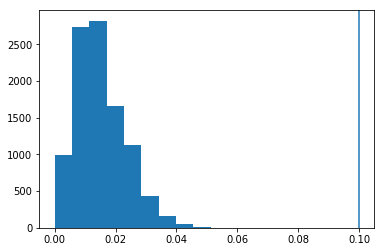

In [27]:
pop = [0.16,0.64,0.2]
answer = []
for i in range(0,10001):
    sample = gera_amostra(1000)
    answer.append(tvd(pop,sample))

    
answer.sort()
plt.hist(answer)
plt.axvline(x=0.1)
plt.show()

F) Escreva uma função que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de 90% de confiança

In [30]:

def q1f():
    return np.percentile(answer,90)

q1f()
    

0.026000000000000023

# Exercício 02:

Usando os dados do arquivo ```baby.csv```, vamos realizar um teste por permutação.

In [10]:
import pandas as pd

In [36]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,3.401940,284,27,1.5748,2.834950,False
1,3.203493,282,33,1.6256,3.827183,False
2,3.628736,279,28,1.6256,3.260193,True
3,3.061746,282,23,1.7018,3.543687,True
4,3.855532,286,25,1.5748,2.636503,False


A) Implemente uma função que retorne a diferença entre a média dos pesos dos bebês para as mães fumantes e a média para as mães não fumantes. Exemplo:

```python
def q2a(df):
    media_fumantes = 3.1
    media_nao_fumantes = 3.8
    return -0.7
```

In [51]:
def q2a(df):
    fumantes = df['Birth Weight'][df['Maternal Smoker']==True]
    nao_fumantes = df['Birth Weight'][df['Maternal Smoker']==False]
    print(fumantes.mean() - nao_fumantes.mean())
    
q2a(df)

-0.2626905088456186


B) Realize permutações com os rótulos (mães fumantes / não fumantes), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias de peso dos bebês, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

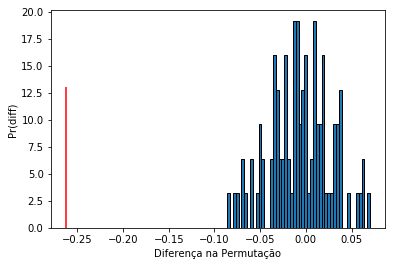

In [13]:
from IPython.display import Image
Image('100permutacoes.png')

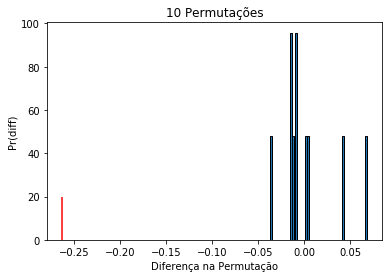

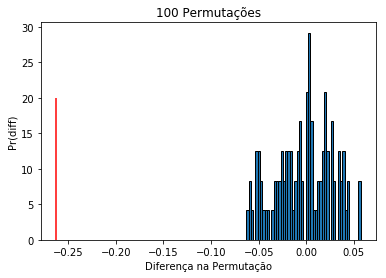

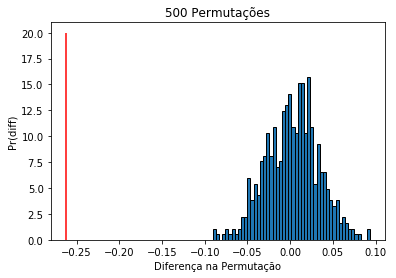

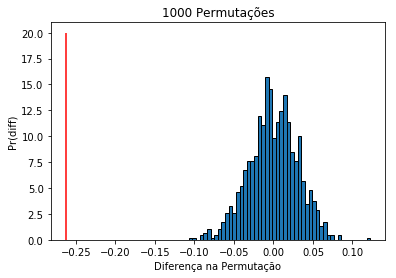

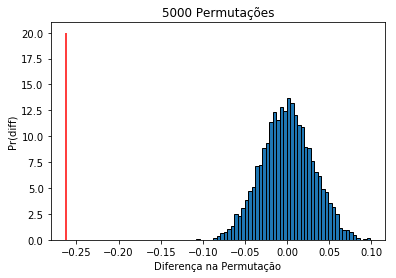

In [129]:
filtro = df['Maternal Smoker'] == True
t_obs = df[filtro]['Birth Weight'].mean() - df[~filtro]['Birth Weight'].mean() 




def difference(df,filtro):
    np.random.shuffle(filtro.values)
    return df[filtro]['Birth Weight'].mean() - df[~filtro]['Birth Weight'].mean()

def plot_permutation(N, df, filtro):
    diferencas = np.zeros(N)
    for i in range(N):
        np.random.shuffle(filtro.values)
        diff = difference(df,filtro)
        diferencas[i] = diff
    plt.figure(N)
    plt.xlabel('Diferença na Permutação')
    plt.ylabel('Pr(diff)')
    plt.title(str(N)+" Permutações")
    plt.vlines(t_obs,0,20,color='red')
    plt.hist(diferencas, bins=50, density=True, edgecolor='k')

plot_permutation(10,df,filtro)
plot_permutation(100,df,filtro)
plot_permutation(500,df,filtro)
plot_permutation(1000,df,filtro)
plot_permutation(5000,df,filtro)

B) Escreva abaixo o que você observou com os gráficos.

Conforme aumentamos o número de permutações, uma tendência se mantém: o valor observado é sempre muito distoante de todos encontrados na distribuição das permutações, o que indica que o valor observado é significante e não aleatório.